# Micro-level data for the narchiver

_Nick Janetos_

_January 9th, 2016_

This document containts scratch work on viewing micro-level data in the narchiver.

In [2]:
# Load all the data
exec(open("load_data.py").read())
%matplotlib inline

## Top 10 vendors, listings

In [6]:
# Count the number of reviews for each vendor
for v in vendors['ID']:
    vendors.set_value(vendors['ID'] == v, 'NUM_REVIEWS', len(reviews[reviews['VENDOR'] == v]))
    
# Count the number of reviews for each listing
#for l in listings['ID']:
#    listings.set_value(listings['ID'] == l, 'NUM_REVIEWS', len(reviews[reviews['LISTING'] == l]))

In [10]:
print(vendors.sort_values('NUM_REVIEWS', ascending = False)[0:9])

        ID            NAME  NUM_REVIEWS
794    844       Drugs4you         7636
506    535  canadianforger         7419
715    756   cannabis-king         6954
491    519    psychotropix         6925
727    769      lostheaven         6753
394    420   HumboldtFarms         6689
934    998       Markovich         6530
375    401        Discover         6266
1257  1347            Zues         5982


### Price history, by listing

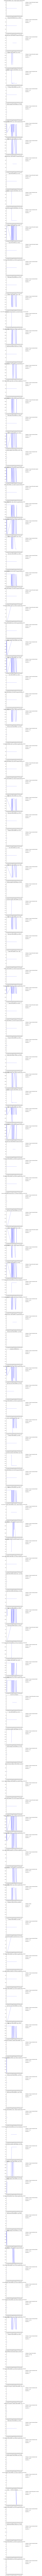

In [12]:
vendor_id = 844
listings_all = listings[listings['VENDOR'] == vendor_id]
prices_all = prices[prices['VENDOR'] == vendor_id]
num_listings = len(listings_all)

fig, axes = plt.subplots(nrows = num_listings, ncols = 2, figsize = (12, num_listings*6))

i = 0
for l_id in listings_all['ID']:
    listing = listings_all[listings_all['ID'] == l_id]
    p_temp = prices_all[prices_all['LISTING'] == l_id]
    vals   = [around(p, decimals = 2) for p in p_temp['PRICE']]
    dates  = p_temp['DATE']*86400
    dates  = [datetime.datetime.fromtimestamp(d) for d in dates]
    
    axes[i, 0].plot(dates, vals)
    axes[i, 0].fmt_xdata = mdates.DateFormatter('%m-%d')
    axes[i, 0].set_title(listing.iloc[0][1])
    plt.setp(axes[i, 0].xaxis.get_majorticklabels(), rotation=25)
    axes[i, 0].set_xlim(min_date, max_date)
    
    axes[i, 1].axis('off')
    axes[i, 1].text(0, 0.9, 'Category: ' + categories[listing.iloc[0][2] - 1][0], size = 14)
    axes[i, 1].text(0, 0.8, 'Amount: ' + str(listing.iloc[0][5]) + ' ' + str(listing.iloc[0][4]), size = 14)
    axes[i, 1].text(0, 0.7, 'Quantity: ' + str(listing.iloc[0][6]), size = 14)
    i = i + 1